# Projet de Clustering et Réduction de Dimensions en Marketing

## Contexte
Ce projet vise à segmenter les clients d'une entreprise en fonction de leurs comportements d'achat en utilisant des techniques de clustering et de réduction de dimensions.

## Objectifs
1. Explorer et prétraiter les données de segmentation client
2. Appliquer différentes techniques de clustering (K-means, CAH, DBSCAN)
3. Réduire la dimensionnalité des données (PCA, t-SNE)
4. Visualiser et interpréter les résultats

## 1. Installation et importation des bibliothèques

In [1]:
# Installation des bibliothèques nécessaires
#!pip install pandas numpy matplotlib seaborn scikit-learn plotly

In [7]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Importation de nos fonctions personnalisées
from clustering_reduction_marketing_functions import *

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Configuration du style graphique
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline


## 2. Chargement des données

In [2]:
# Chargement des données
train_df, test_df = load_data()

# Vérification du chargement
print("Dimensions de l'ensemble d'entraînement:", train_df.shape)
print("Dimensions de l'ensemble de test:", test_df.shape)

# Affichage des premières lignes
print("\nAperçu de l'ensemble d'entraînement:")
display(train_df.head())

print("\nColonnes de l'ensemble d'entraînement:", train_df.columns.tolist())

Dimensions de l'ensemble d'entraînement: (8068, 11)
Dimensions de l'ensemble de test: (2627, 11)

Aperçu de l'ensemble d'entraînement:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A



Colonnes de l'ensemble d'entraînement: ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']


**📋 Description des Variables**

| Variable         | Type                  | Description                                                                 |
|------------------|-----------------------|------------------------------------------------------------------------------|
| ID               | Numérique (entier)    | Identifiant unique attribué à chaque client                                 |
| Gender           | Catégorielle          | Genre du client (ex : Male, Female)                                         |
| Ever_Married     | Catégorielle binaire  | Statut matrimonial (ex : Yes, No)                                           |
| Age              | Numérique (entier)    | Âge du client                                                               |
| Graduated        | Catégorielle binaire  | Niveau d'éducation (ex : Yes, No)                                           |
| Profession       | Catégorielle          | Profession du client (ex : Engineer, Doctor, Artist, etc.)                 |
| Work_Experience  | Numérique (décimal)   | Nombre d'années d'expérience professionnelle                                |
| Spending_Score   | Catégorielle ordinale | Score de dépenses du client (Low, Average, High)                            |
| Family_Size      | Numérique (entier)    | Nombre de personnes dans le foyer                                           |
| Var_1            | Catégorielle          | Variable supplémentaire (Cat_1, Cat_2, etc.)                                |
| Segmentation     | Catégorielle cible    | Segment marketing attribué au client (A, B, C, D) — variable à prédire      |

## 3. Exploration des données

In [3]:
# Exploration de l'ensemble d'entraînement
explore_data(train_df, "Ensemble d'entraînement")

# Exploration de l'ensemble de test
explore_data(test_df, "Ensemble de test")


=== Exploration de Ensemble d'entraînement ===

Dimensions: (8068, 11)

Aperçu des données:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A



Résumé statistique:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN



Types de données:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

Valeurs manquantes par colonne:
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Valeurs uniques par colonne catégorielle:

Gender:
Gender
Male      4417
Female    3651
Name: count, dtype: int64

Ever_Married:
Ever_Married
Yes    4643
No     3285
NaN     140
Name: count, dtype: int64

Graduated:
Graduated
Yes    4968
No     3022
NaN      78
Name: count, dtype: int64

Profession:
Profession
Artist           2516
Healthcare       1332
Entertainment 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A



Résumé statistique:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,2627.000000,2627,2577,2627.000000,2603,2589,2358.000000,2627,2514.000000,2595,2627
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,A
freq,NaN,1424,1520,NaN,1602,802,NaN,1616,NaN,1672,846
mean,463433.918919,NaN,NaN,43.649791,NaN,NaN,2.552587,NaN,2.825378,NaN,NaN
std,2618.245698,NaN,NaN,16.967015,NaN,NaN,3.341094,NaN,1.551906,NaN,NaN
min,458989.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461162.500000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463379.000000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN
75%,465696.000000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN



Types de données:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

Valeurs manquantes par colonne:
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

Valeurs uniques par colonne catégorielle:

Gender:
Gender
Male      1424
Female    1203
Name: count, dtype: int64

Ever_Married:
Ever_Married
Yes    1520
No     1057
NaN      50
Name: count, dtype: int64

Graduated:
Graduated
Yes    1602
No     1001
NaN      24
Name: count, dtype: int64

Profession:
Profession
Artist           802
Healthcare       418
Entertainment   

## 4. Prétraitement des données

In [4]:
# Prétraitement de l'ensemble d'entraînement
train_processed, label_encoders = preprocess_data(train_df, is_train=True)

# Prétraitement de l'ensemble de test avec les mêmes encodeurs
test_processed, _ = preprocess_data(test_df, is_train=False, label_encoders=label_encoders)

# Vérification des dimensions
print(f"✅ Dimensions des données d'entraînement : {train_processed.shape}")
print(f"✅ Dimensions des données de test       : {test_processed.shape}")

# Affichage des données prétraitées
print("\n🔍 Aperçu des données d'entraînement prétraitées :")
display(train_processed.head())

print("\n🔍 Aperçu des données de test prétraitées :")
display(test_processed.head())

# Statistiques descriptives
print("\n📊 Statistiques descriptives des données d'entraînement :")
display(train_processed.describe())

✅ Dimensions des données d'entraînement : (8068, 10)
✅ Dimensions des données de test       : (2627, 10)

🔍 Aperçu des données d'entraînement prétraitées :


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,-1.284623,0,5,-0.451136,2,0.762698,3,3
1,0,1,-0.327151,1,2,-0.451136,0,0.095802,3,0
2,0,1,1.408268,1,2,-0.451136,2,-1.237990,5,1
3,1,1,1.408268,1,7,-0.757410,1,-0.571094,5,1
4,0,1,-0.207467,1,3,-0.451136,1,2.096491,5,0



🔍 Aperçu des données de test prétraitées :


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,-0.450948,1,2,-0.748105,2,-1.172097,5,1
1,1,1,-0.391999,1,5,1.752242,0,0.792450,5,0
2,0,1,1.494372,0,0,-0.748105,2,-1.172097,5,0
3,1,1,0.904881,0,4,2.689872,1,-0.517248,5,1
4,0,0,-1.453083,0,8,-0.435562,2,0.792450,5,0



📊 Statistiques descriptives des données d'entraînement :


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068.000000,8.068000e+03,8068.000000,8068.000000,8.068000e+03,8068.000000,8.068000e+03,8068.000000,8068.000000
mean,0.547471,0.592836,6.340986e-17,0.625434,2.746901,-4.139255e-17,1.359941,-9.599549e-17,4.147372,1.561973
std,0.497772,0.491336,1.000062e+00,0.484041,2.541418,1.000062e+00,0.848418,1.000062e+00,1.419453,1.139029
min,0.000000,0.000000,-1.523992e+00,0.000000,0.000000,-7.574104e-01,0.000000,-1.237990e+00,0.000000,0.000000
25%,0.000000,0.000000,-8.058871e-01,0.000000,0.000000,-7.574104e-01,1.000000,-5.710940e-01,3.000000,1.000000
50%,1.000000,1.000000,-2.074667e-01,1.000000,3.000000,-4.511360e-01,2.000000,9.580227e-02,5.000000,2.000000
75%,1.000000,1.000000,5.704798e-01,1.000000,5.000000,4.676873e-01,2.000000,7.626985e-01,5.000000,3.000000
max,1.000000,1.000000,2.724793e+00,1.000000,8.000000,3.530431e+00,2.000000,4.097180e+00,6.000000,3.000000


## 5. Analyse de corrélation

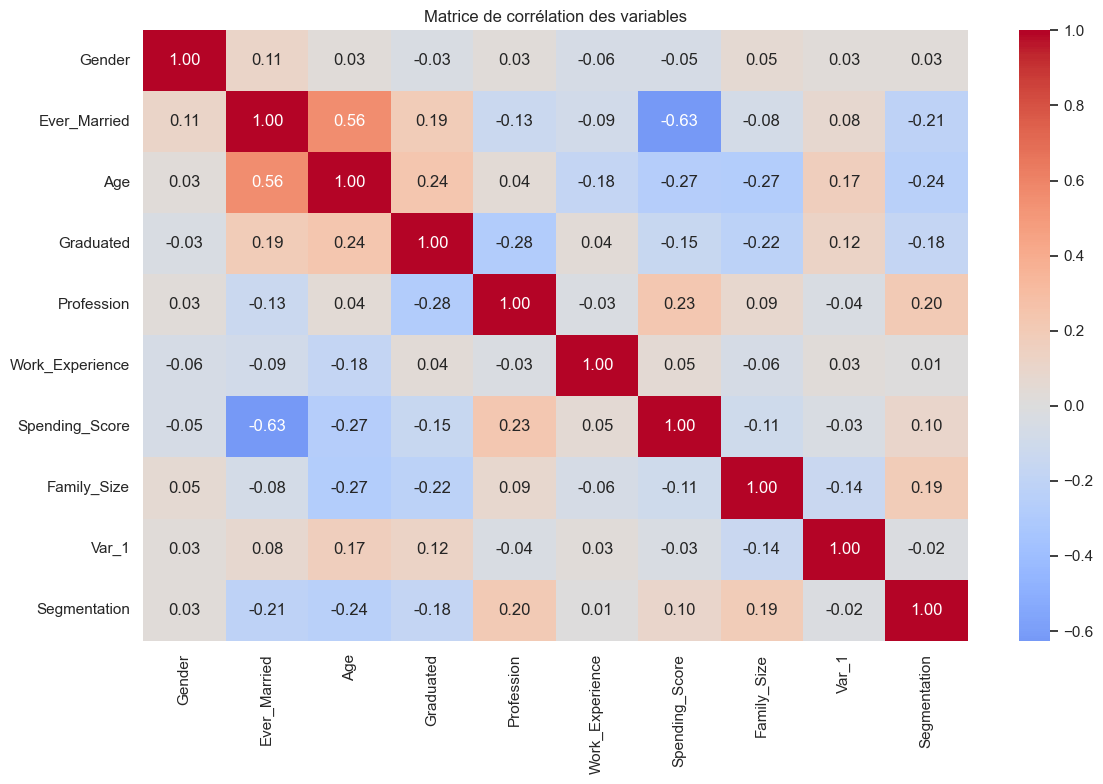

In [5]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
corr_matrix = train_processed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matrice de corrélation des variables")
plt.tight_layout()
plt.show()

## 6. Détermination du nombre optimal de clusters

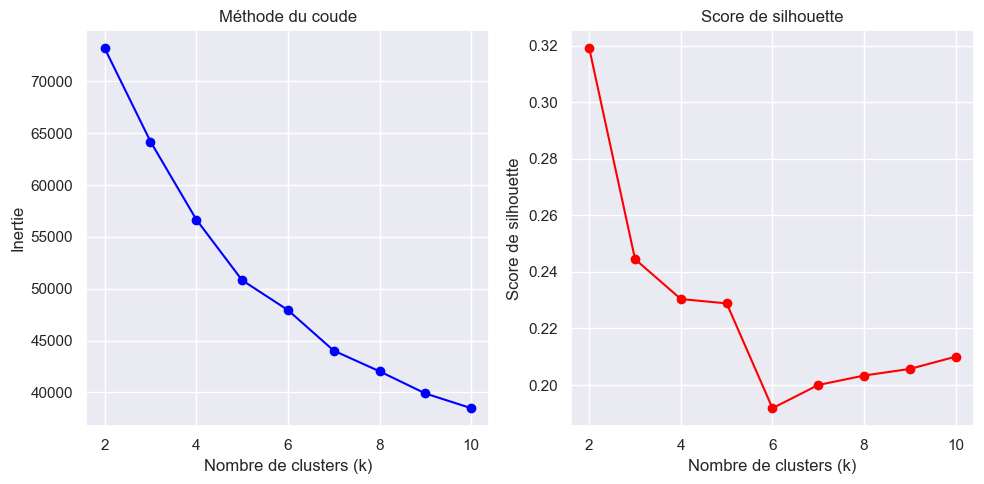

In [8]:
# Utilisation de la méthode du coude et du score de silhouette
inertias, silhouette_scores = determine_optimal_clusters(
    train_processed, max_clusters=10
)

## 7. Application du clustering K-means

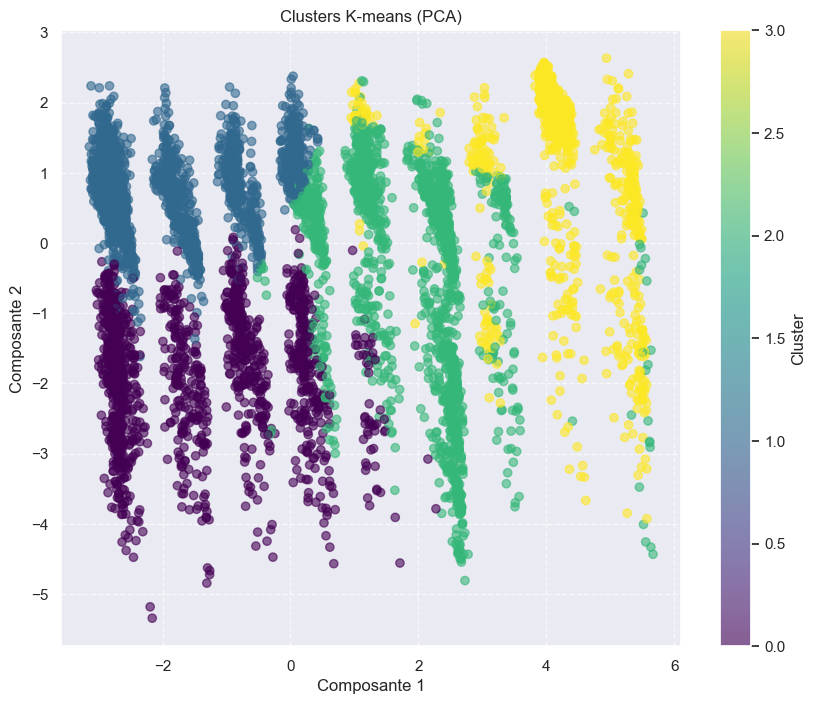


=== Métriques d'évaluation ===
Nombre de clusters: 4
Score de silhouette: 0.230 (plus proche de 1 est meilleur)
Indice de Calinski-Harabasz: 2750.87 (plus élevé est meilleur)
Indice de Davies-Bouldin: 1.654 (plus proche de 0 est meilleur)


In [9]:
# Application de K-means avec le nombre optimal de clusters
n_clusters = 4  # À ajuster en fonction de l'analyse précédente
kmeans_labels, kmeans_model = apply_clustering(
    train_processed, n_clusters=n_clusters, method='kmeans'
)

# Réduction de dimension pour la visualisation
pca_result = reduce_dimensionality(train_processed, method='pca')

# Visualisation des clusters
plot_clusters(pca_result, kmeans_labels, "Clusters K-means (PCA)")

# Évaluation du clustering
kmeans_metrics = evaluate_clustering(train_processed, kmeans_labels)

## 8. Comparaison avec d'autres méthodes de clustering

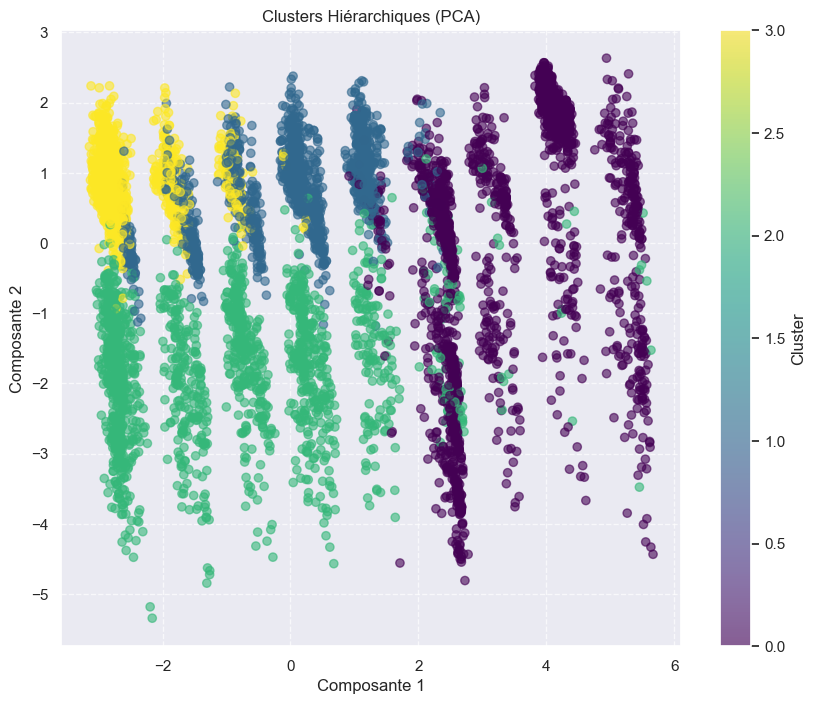


=== Métriques d'évaluation ===
Nombre de clusters: 4
Score de silhouette: 0.171 (plus proche de 1 est meilleur)
Indice de Calinski-Harabasz: 2326.71 (plus élevé est meilleur)
Indice de Davies-Bouldin: 1.778 (plus proche de 0 est meilleur)


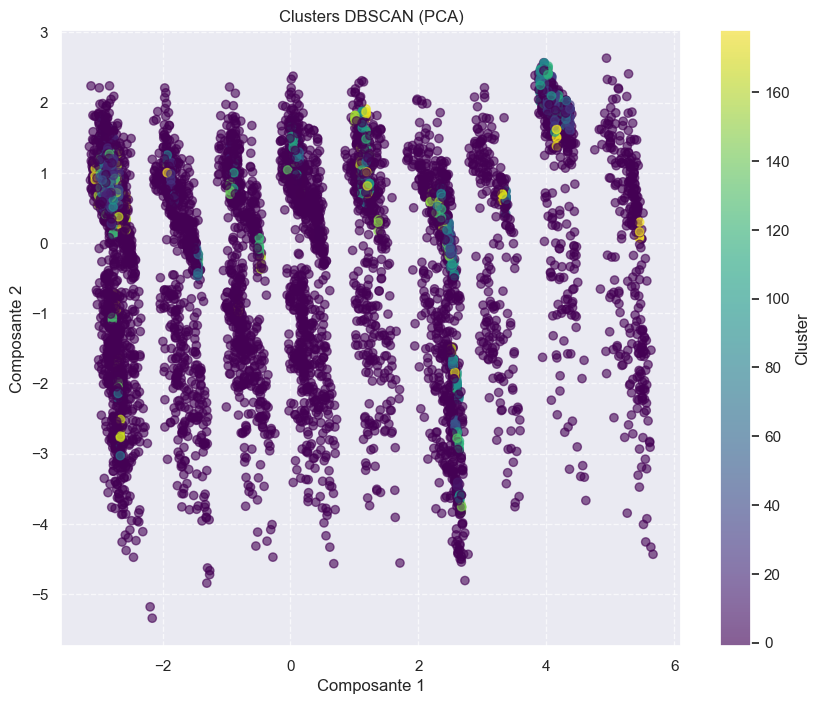


=== Métriques d'évaluation ===
Nombre de clusters: 180
Score de silhouette: -0.312 (plus proche de 1 est meilleur)
Indice de Calinski-Harabasz: 17.17 (plus élevé est meilleur)
Indice de Davies-Bouldin: 1.198 (plus proche de 0 est meilleur)


In [10]:
# Clustering hiérarchique
hierarchical_labels, _ = apply_clustering(
    train_processed, n_clusters=n_clusters, method='hierarchical'
)

# Visualisation
plot_clusters(pca_result, hierarchical_labels, "Clusters Hiérarchiques (PCA)")

# Évaluation
hierarchical_metrics = evaluate_clustering(train_processed, hierarchical_labels)

# DBSCAN (sans spécifier le nombre de clusters)
dbscan_labels, _ = apply_clustering(
    train_processed, method='dbscan'
)

# Visualisation
plot_clusters(pca_result, dbscan_labels, "Clusters DBSCAN (PCA)")

# Évaluation
dbscan_metrics = evaluate_clustering(train_processed, dbscan_labels)

## 9. Visualisation avec t-SNE

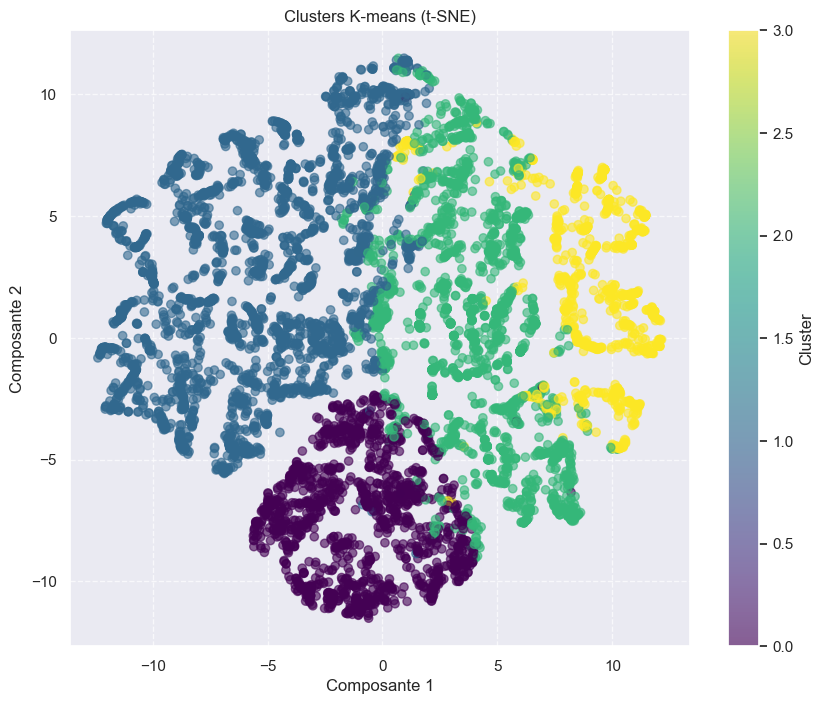

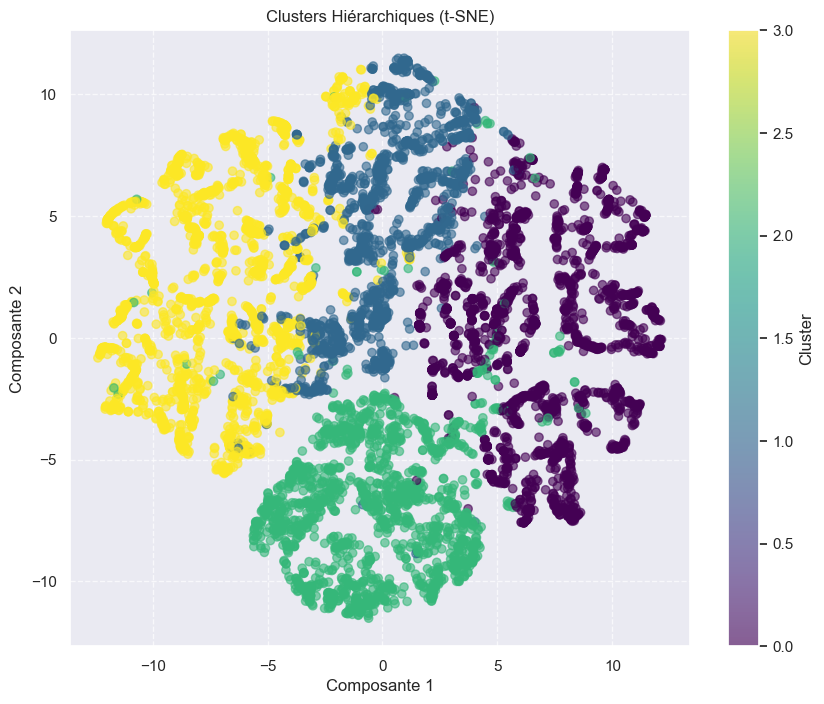

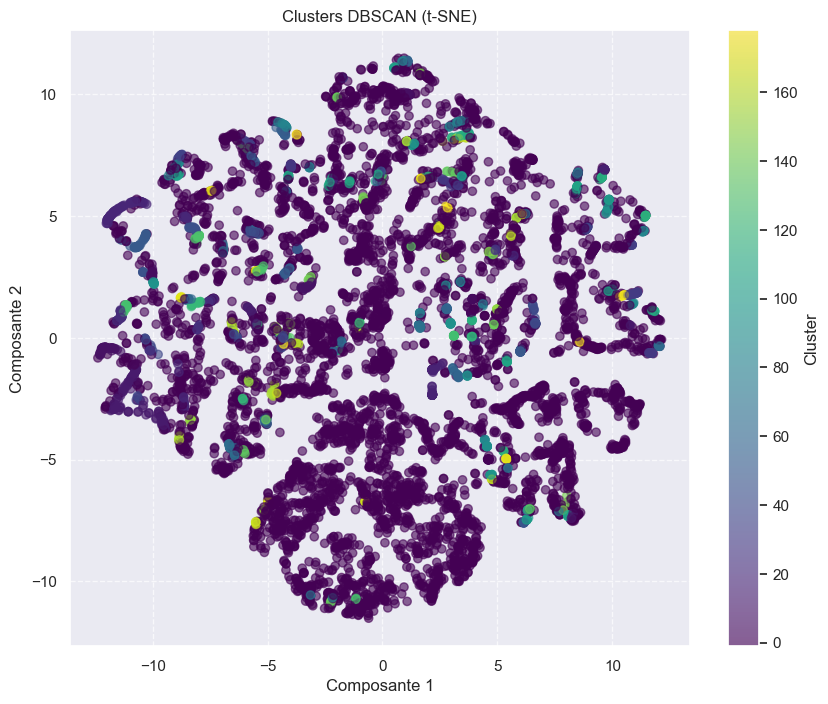

In [11]:
# Réduction de dimension avec t-SNE
tsne_result = reduce_dimensionality(train_processed, method='tsne')

# Visualisation des clusters K-means dans l'espace t-SNE
plot_clusters(tsne_result, kmeans_labels, "Clusters K-means (t-SNE)")

# Visualisation des clusters hiérarchiques dans l'espace t-SNE
plot_clusters(tsne_result, hierarchical_labels, "Clusters Hiérarchiques (t-SNE)")

# Visualisation des clusters DBSCAN dans l'espace t-SNE
plot_clusters(tsne_result, dbscan_labels, "Clusters DBSCAN (t-SNE)")

## 10. Interprétation des clusters

Age            Work_Experience           Family_Size           Segmentation
              mean        std            mean       std        mean       std     <lambda>
Cluster                                                                                   
0        41.783212  11.868127        2.339008  3.090336    3.044568  1.657660            A
1        45.316065  12.979900        2.754539  3.452177    2.459100  1.267719            C
2        32.880266  13.149230        2.987032  3.619341    3.611551  1.609911            D
3        62.789026  20.443148        1.960396  3.078734    2.166667  1.149321            A

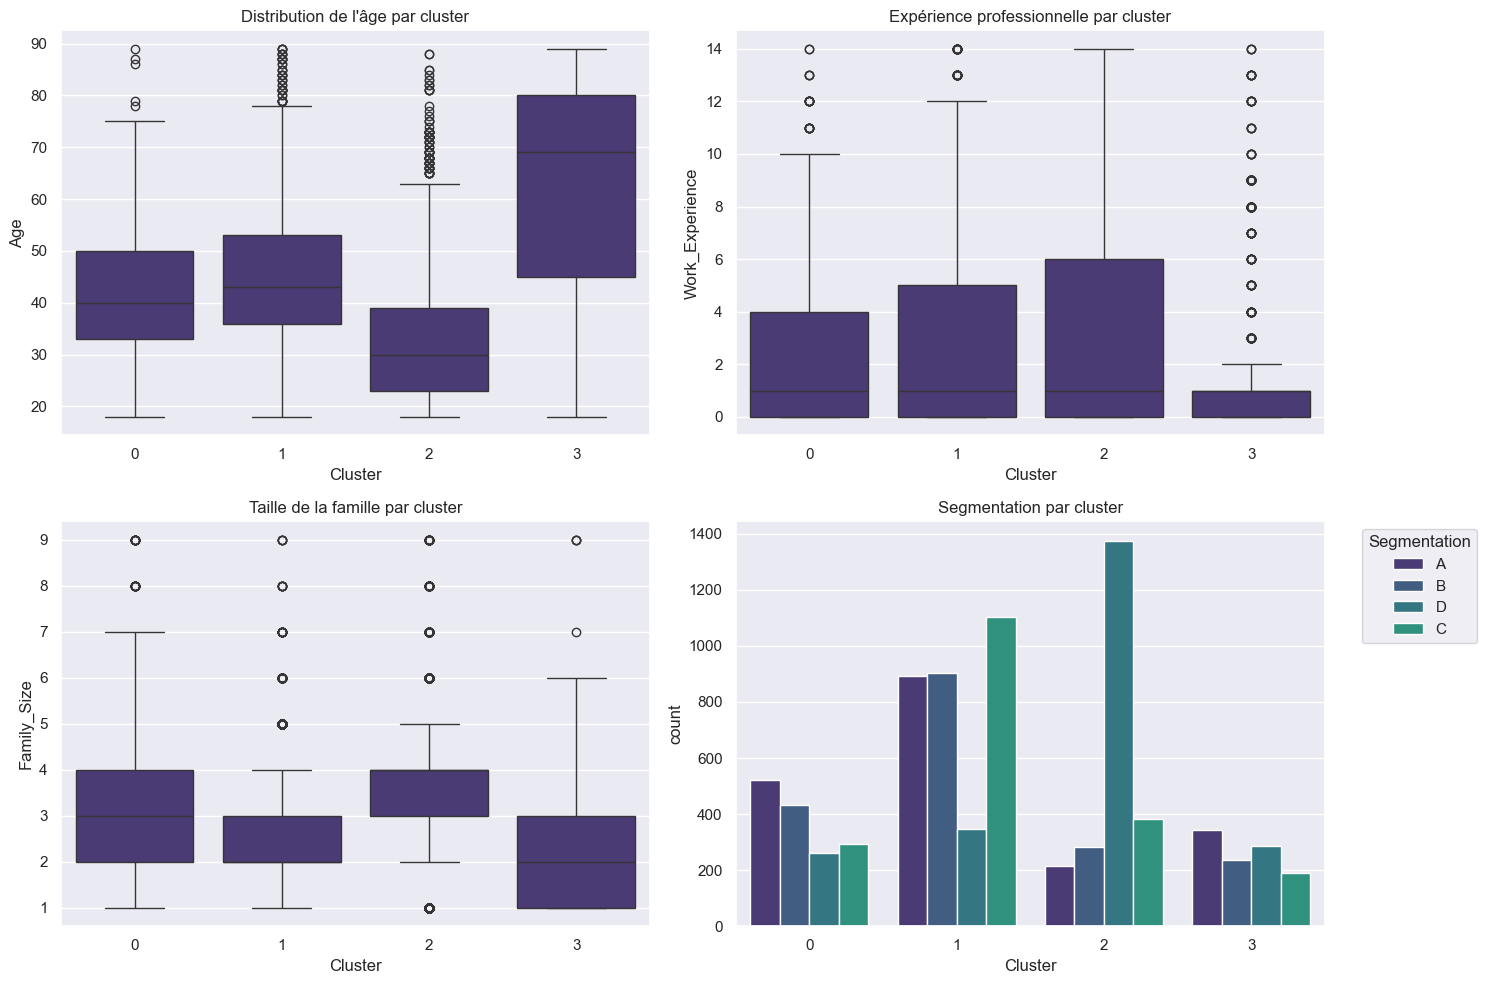

In [12]:
# Ajout des labels de cluster au DataFrame original
train_df['Cluster'] = kmeans_labels

# Analyse des caractéristiques des clusters
cluster_analysis = train_df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Work_Experience': ['mean', 'std'],
    'Family_Size': ['mean', 'std'],
    'Segmentation': lambda x: x.mode()[0]
})

display(cluster_analysis)

# Visualisation des caractéristiques des clusters
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='Age', data=train_df)
plt.title('Distribution de l\'âge par cluster')

plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Work_Experience', data=train_df)
plt.title('Expérience professionnelle par cluster')

plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Family_Size', data=train_df)
plt.title('Taille de la famille par cluster')

plt.subplot(2, 2, 4)
sns.countplot(x='Cluster', hue='Segmentation', data=train_df)
plt.title('Segmentation par cluster')
plt.legend(title='Segmentation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 11. Application du meilleur modèle à l'ensemble de test

Répartition des clusters dans l'ensemble de test:


Cluster
0     507
1    1029
2     716
3     375
Name: count, dtype: int64

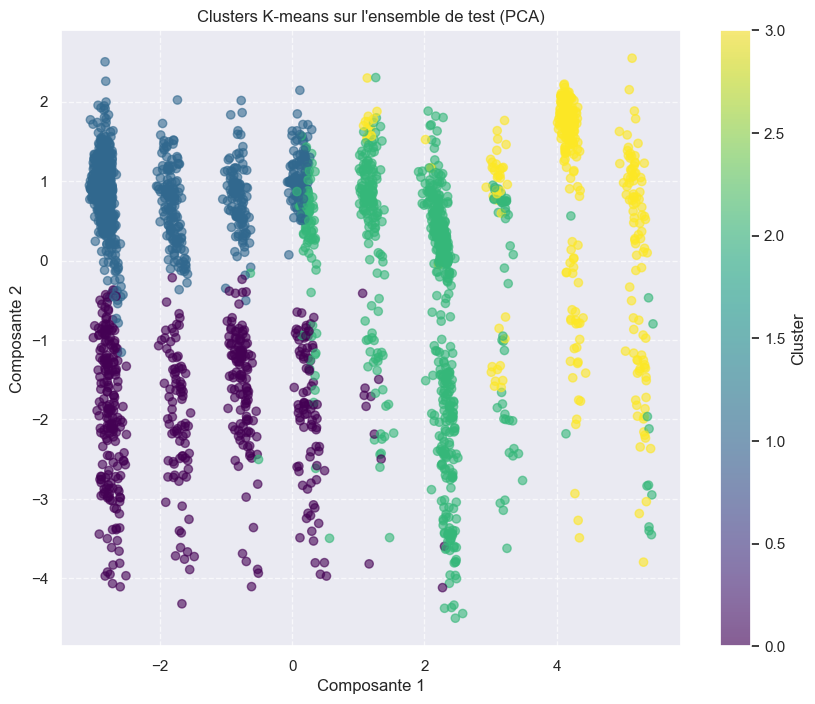

In [13]:
# Application du modèle K-means à l'ensemble de test
test_processed = test_processed[train_processed.columns]  # S'assurer des mêmes colonnes
test_labels = kmeans_model.predict(test_processed)

# Ajout des prédictions au DataFrame de test
test_df['Cluster'] = test_labels

# Affichage des résultats
print("Répartition des clusters dans l'ensemble de test:")
display(test_df['Cluster'].value_counts().sort_index())

# Visualisation des clusters de test
test_pca = reduce_dimensionality(test_processed, method='pca')
plot_clusters(test_pca, test_labels, "Clusters K-means sur l'ensemble de test (PCA)")

## 12. Conclusion et recommandations

### Résumé des résultats
- **Nombre optimal de clusters** : [À compléter]
- **Méthode de clustering la plus performante** : [À compléter]
- **Caractéristiques des clusters** :
  1. **Cluster 0** : [Description]
  2. **Cluster 1** : [Description]
  3. **Cluster 2** : [Description]
  4. **Cluster 3** : [Description]

### Recommandations marketing
1. **Cluster X** : [Recommandations spécifiques]
2. **Cluster Y** : [Recommandations spécifiques]
3. **Cluster Z** : [Recommandations spécifiques]

### Limites et améliorations possibles
- [Liste des limites]
- [Pistes d'amélioration]